# S07 - Démonstration 2: Telco
Classification avec [les données de désabonnement du service client](https://www.kaggle.com/blastchar/telco-customer-churn).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (average_precision_score, confusion_matrix,
                             precision_recall_curve, precision_score,
                             recall_score)
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     GridSearchCV)
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Bloc 1: chargement des données

In [2]:
# Chargement des données
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/data/Telco-Customer-Churn_dummies.csv'
customer_data = pd.read_csv(url)
customer_data.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1


## Bloc 2: extraction des caractéristiques
Voir le fichier complément pour le détail de l'extraction des caractéristiques.

In [3]:
# Prendre toutes les colonnes sauf la dernière
# La dernière colonne est la valeur cible
selected_features = customer_data.columns[:-1].values
X = customer_data[selected_features].values
y = customer_data['Churn_Yes'].values
print(f"X: {X[:5]}")
print(f"y: {y[:5]}")

X: [[0.00000e+00 1.00000e+00 2.98500e+01 2.98500e+01 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00]
 [0.00000e+00 3.40000e+01 5.69500e+01 1.88950e+03 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [0.00000e+00 2.00000e+00 5.38500e+01 1.08150e+02 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [0.00000e+00 4.50000e+01 4.23000e+01 1.84075e+03 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.0000

## Bloc 3: modèles et entraînement

In [4]:
# Séparation des données pour l'entraînement et l'évaluation (75%/25% par défaut)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f"Nombre d'observations pour l'entraînement: {X_train.shape[0]}")
print(f"Nombre d'observations pour l'évaluation: {X_test.shape[0]}")

Nombre d'observations pour l'entraînement: 5274
Nombre d'observations pour l'évaluation: 1758


### Modèle de régression logistique

In [5]:
# Entraînement de la régression logistique
# avec une recherche d'hyperparamètre avec une grille (grid search)
# et une validation croisée
best_score = 0
for C in [0.001, 0.01, 1, 10, 100, 1000]:
    # on crée le modèle
    logreg = LogisticRegression(max_iter=10000, random_state=0, C=C)
    # on fait la validation croisée
    scores = cross_val_score(logreg, X_train, y_train, cv=5)
    # on calcule la justesse moyenne
    score = np.mean(scores)
    #print(scores, score)
    # si le score est meilleur, on le conserve (avec le paramètre C)
    if score > best_score:
        best_score = score
        best_C = C
# réentraîner le meilleur modèle sur toutes les données d'entraînement
logreg = LogisticRegression(max_iter=10000, random_state=0, C=best_C)
logreg.fit(X_train, y_train)  

LogisticRegression(C=0.01, max_iter=10000, random_state=0)

### Modèle d'arbre de décision

In [6]:
# Entraînement de l'arbre de décision
# Ce code est similaire au précédent, mais il utilise la fonction GridSearchCV
# Voir la section 5.2.3 du livre "Intro to ML with Python" pour plus d'information
param_grid = {'max_leaf_nodes': [10, 20, 28, 30, 40],
              'random_state': [0]}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,
                    return_train_score=True)
tree.fit(X_train, y_train)  # ceci retourne automatiquement le meilleur estimateur entraîné sur toutes les données train

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [10, 20, 28, 30, 40],
                         'random_state': [0]},
             return_train_score=True)

In [7]:
# Analyse des résultats de la validation croisée
cv_results = pd.DataFrame(tree.cv_results_)
display(cv_results)
print(tree.best_estimator_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014240,0.003031,0.000794,0.000738,10,0,"{'max_leaf_nodes': 10, 'random_state': 0}",0.790521,0.777251,0.781043,...,0.782708,0.004412,5,0.785731,0.796871,0.791183,0.789050,0.795024,0.791572,0.004016
1,0.012769,0.005202,0.000400,0.000490,20,0,"{'max_leaf_nodes': 20, 'random_state': 0}",0.789573,0.779147,0.787678,...,0.785171,0.006010,4,0.806826,0.801375,0.800901,0.803745,0.800237,0.802617,0.002414
2,0.009872,0.004952,0.004204,0.006245,28,0,"{'max_leaf_nodes': 28, 'random_state': 0}",0.798104,0.794313,0.786730,...,0.790669,0.006968,2,0.814648,0.813463,0.812515,0.808959,0.802607,0.810438,0.004352
3,0.016102,0.002286,0.000691,0.000964,30,0,"{'max_leaf_nodes': 30, 'random_state': 0}",0.800948,0.794313,0.785782,...,0.793135,0.005199,1,0.816070,0.813463,0.814648,0.811567,0.807346,0.812619,0.003022
4,0.014333,0.002304,0.000602,0.000492,40,0,"{'max_leaf_nodes': 40, 'random_state': 0}",0.798104,0.787678,0.786730,...,0.790481,0.004309,3,0.821759,0.819626,0.819626,0.815596,0.819905,0.819302,0.002017


DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)


## Évaluation
Calcul de la précision et du rappel du modèle récemment ajusté (régression logistique ou arbre de décision)

In [8]:
# Affichage des résultats
y_predict = logreg.predict(X_test) # à utiliser pour la régression logistique
print("**Régression logistique**")
print(f"Justesse (entraînement): {logreg.score(X_train, y_train):.3f}")  # accuracy
print(f"Justesse (test): {logreg.score(X_test, y_test):.3f}")  # accuracy
print(f"Précision (test): {precision_score(y_test, y_predict):.3f}")
print(f"Rappel (test): {recall_score(y_test, y_predict):.3f}")
print(f"Matrice de confusion (test):\n{confusion_matrix(y_test, y_predict)}")

y_predict = tree.predict(X_test)
print("\n**Arbre de décision**")
print(f"Justesse (entraînement): {tree.score(X_train, y_train):.3f}")  # accuracy
print(f"Justesse (test): {tree.score(X_test, y_test):.3f}")  # accuracy
print(f"Précision (test): {precision_score(y_test, y_predict):.3f}")
print(f"Rappel (test): {recall_score(y_test, y_predict):.3f}")
print(f"Matrice de confusion (test):\n{confusion_matrix(y_test, y_predict)}")

**Régression logistique**
Justesse (entraînement): 0.803
Justesse (test): 0.809
Précision (test): 0.668
Rappel (test): 0.494
Matrice de confusion (test):
[[1201  110]
 [ 226  221]]

**Arbre de décision**
Justesse (entraînement): 0.811
Justesse (test): 0.796
Précision (test): 0.641
Rappel (test): 0.452
Matrice de confusion (test):
[[1198  113]
 [ 245  202]]


Voici le code pour tracer [la courbe de précision-rappel ](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py).

*La courbe précision-rappel est généralement utilisée pour analyser un modèle de régression logistique pour toutes les valeurs de seuils possibles, mais vous trouverez également le code pour l'arbre de décision dans la prochaine cellule*

Text(0.5, 1.0, 'Précision moyenne=0.63')

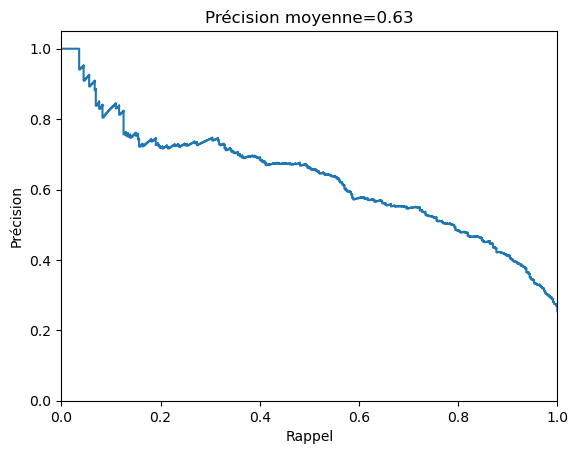

In [9]:
# Régression logistique
y_prob = logreg.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision)
average_precision = average_precision_score(y_test, y_prob)

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Précision moyenne={average_precision:0.2f}')

Text(0.5, 1.0, 'Précision moyenne=0.59')

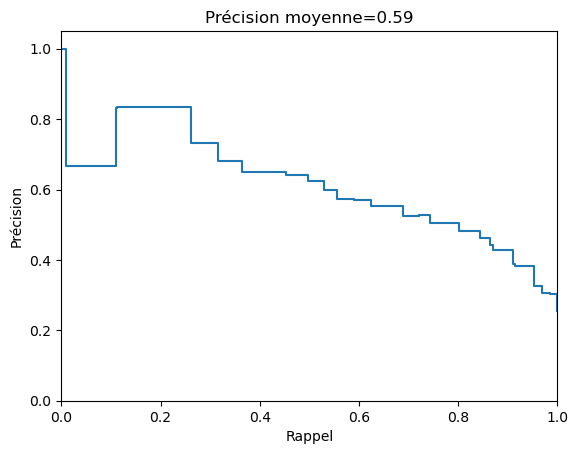

In [10]:
# Arbre de décision
y_prob = tree.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision)
average_precision = average_precision_score(y_test, y_prob)

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Précision moyenne={average_precision:0.2f}')